<a href="https://colab.research.google.com/github/manishiitg/ML_Experments/blob/master/keras/keras_very_simple_cnn_and_vgg16_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a simple NN for CNN using keras, and i am trying to classify images taken from flipkart/amazon. the dataset is very small.

In [3]:
!unzip tshirt_jeans_data.zip

Archive:  tshirt_jeans_data.zip
  inflating: tshirt_jeans_data/car.jpg  
  inflating: tshirt_jeans_data/download.jpg  
   creating: tshirt_jeans_data/new_test_data/
   creating: tshirt_jeans_data/new_test_data/jeans/
  inflating: tshirt_jeans_data/new_test_data/jeans/31-ro-01ah-04-lt-blue-spykar-original-imaf4t6qg4zvwbtg.jpeg  
  inflating: tshirt_jeans_data/new_test_data/jeans/32-47752-0089-denizen-original-imafdfwdajqaaqjd.jpeg  
  inflating: tshirt_jeans_data/new_test_data/jeans/32-w32398w2220x-wrangler-20x-original-imaf96fwwvqygg84.jpeg  
  inflating: tshirt_jeans_data/new_test_data/jeans/32-w34043w22smu-wrangler-original-imafgzswgjbdzaxp.jpeg  
  inflating: tshirt_jeans_data/new_test_data/jeans/36-w28986w22944-wrangler-original-imafckmna76qj9qt.jpeg  
   creating: tshirt_jeans_data/new_test_data/tshirt/
  inflating: tshirt_jeans_data/new_test_data/tshirt/l-mst-15-try-this-original-imafghg2xpkgbhtv.jpeg  
  inflating: tshirt_jeans_data/new_test_data/tshirt/m-61ywn-lewel-original-im

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import keras
from keras.preprocessing.image import ImageDataGenerator

from __future__ import print_function
import random 
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten
from keras.optimizers import Adam

train_batches = ImageDataGenerator().flow_from_directory("tshirt_jeans_data/train_data", target_size=(224,224), classes=["tshirt","jeans"], batch_size=5)
test_batches = ImageDataGenerator().flow_from_directory("tshirt_jeans_data/test_data", target_size=(224,224), classes=["tshirt","jeans"], batch_size=5)
valid_batches = ImageDataGenerator().flow_from_directory("tshirt_jeans_data/valid_data", target_size=(224,224), classes=["tshirt","jeans"], batch_size=5)


model = Sequential()
model.add( Conv2D(32, (3,3) , strides=(1,1) , activation="relu" , input_shape=(224,224,3))  )
model.add( Flatten() )
model.add( Dense(2, activation="softmax") )

model.summary()

model.compile(Adam(lr=.00001), loss=keras.losses.categorical_crossentropy , metrics=['accuracy'])

model.fit_generator(train_batches,  validation_data=valid_batches  , steps_per_epoch=2, epochs=5, verbose=2)

Found 30 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 9 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
 - 1s - loss: 13.0864 - acc: 0.1000 - val_loss: 7.1636 - val_acc: 0.5556
Epoch 2/5
 - 0s - loss: 8.0590 - acc: 0.5000 - val_loss: 7.1636 - val_acc:

This is a very simple CNN model for image classification. The idea is just see how a CNN works. As the dataset is very small and its a very simple model, accuracy and validation accuracy are not good. This is expected.

**Using pre-trained VV16 model **

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import keras
from keras.preprocessing.image import ImageDataGenerator

from __future__ import print_function
import random 
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten
from keras.optimizers import Adam
from keras.models import Model


train_batches = ImageDataGenerator().flow_from_directory("tshirt_jeans_data/train_data", target_size=(224,224), classes=["tshirt","jeans"], batch_size=5)
valid_batches = ImageDataGenerator().flow_from_directory("tshirt_jeans_data/valid_data", target_size=(224,224), classes=["tshirt","jeans"], batch_size=3)


vggmodel = keras.applications.VGG16()
# vggmodel.summary()


vggmodel.layers.pop()

for layer in vggmodel.layers:
  layer.trainable = False

last = vggmodel.layers[-1].output

x = Dense(2, activation="softmax")(last)


model = Model(vggmodel.inputs, x)

# model.summary()


model.compile(Adam(lr=.0001), loss=keras.losses.categorical_crossentropy , metrics=['accuracy'])

model.fit_generator(train_batches,  validation_data=valid_batches, validation_steps=3  , steps_per_epoch=6, epochs=10, verbose=2)


Found 30 images belonging to 2 classes.
Found 9 images belonging to 2 classes.
Epoch 1/5
 - 11s - loss: 1.3273 - acc: 0.6333 - val_loss: 0.7297 - val_acc: 0.7778
Epoch 2/5
 - 11s - loss: 0.7971 - acc: 0.6667 - val_loss: 0.4827 - val_acc: 0.8889
Epoch 3/5
 - 11s - loss: 0.5178 - acc: 0.8000 - val_loss: 0.3513 - val_acc: 0.8889
Epoch 4/5
 - 11s - loss: 0.3284 - acc: 0.9000 - val_loss: 0.2791 - val_acc: 0.8889
Epoch 5/5
 - 11s - loss: 0.2370 - acc: 0.9000 - val_loss: 0.2535 - val_acc: 0.8889


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import keras
from keras.preprocessing.image import ImageDataGenerator



def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))

    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

Found 12 images belonging to 2 classes.
4/4 [==============================] - 5s 1s/step
['tshirt', 'jeans']
[[0.99296796 0.00703209]
 [0.2902237  0.70977634]
 [0.7691588  0.23084122]
 [0.53398013 0.46601984]
 [0.05587427 0.9441257 ]
 [0.11032977 0.8896702 ]
 [0.44718862 0.5528113 ]
 [0.10425726 0.8957428 ]
 [0.8809407  0.11905934]
 [0.88108855 0.11891139]
 [0.9603582  0.03964183]
 [0.9990007  0.00099928]
 [0.8809407  0.11905934]
 [0.88108855 0.11891146]
 [0.9603581  0.03964187]
 [0.2902237  0.70977634]
 [0.53398013 0.46601984]]


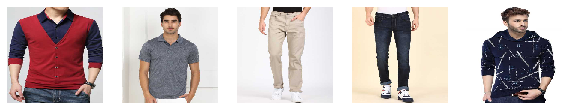

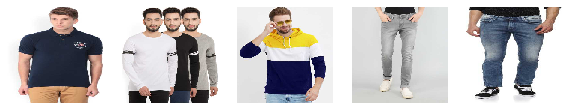

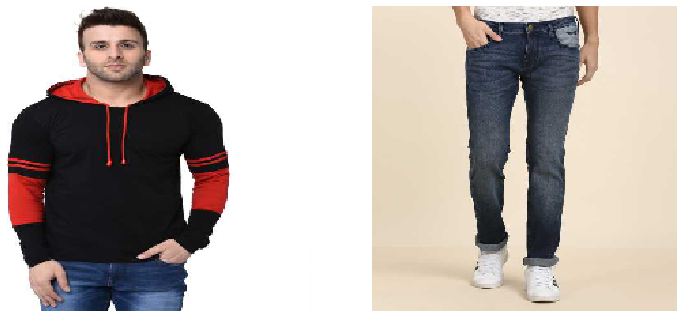

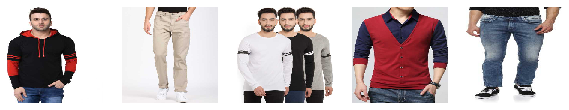

In [11]:
batch_size = 5
no_of_images = 20

test_batches = ImageDataGenerator().flow_from_directory(
    "tshirt_jeans_data/new_test_data", 
    target_size=(224,224), 
    class_mode = "categorical", 
    batch_size=batch_size)

for i in range(1, batch_size):
  ims , y = next(test_batches)
  plots(ims)

probabilities = model.predict_generator(test_batches, steps=no_of_images/batch_size, verbose=1)
print(["tshirt","jeans"])
print(probabilities)

# print( len(probabilities) )

# from sklearn.metrics import confusion_matrix

# y_true = np.array([0] * 10 + [1] * 10)
# y_pred = probabilities > 0.5

# confusion_matrix(y_true, y_pred)

Very accurate prediections using a pretrained model!

In [8]:
!wget https://drop.ndtv.com/albums/AUTO/2019-ford-endeavour-facelift/1.jpg

--2019-11-08 05:07:54--  https://drop.ndtv.com/albums/AUTO/2019-ford-endeavour-facelift/1.jpg
Resolving drop.ndtv.com (drop.ndtv.com)... 104.93.1.106, 2600:1417:76:48f::24e8, 2600:1417:76:482::24e8
Connecting to drop.ndtv.com (drop.ndtv.com)|104.93.1.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135817 (133K) [image/jpeg]
Saving to: ‘1.jpg.1’

1.jpg.1             100%[===================>] 132.63K  --.-KB/s    in 0.006s  

2019-11-08 05:07:54 (20.0 MB/s) - ‘1.jpg.1’ saved [135817/135817]



In [9]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16


# load the model
model = VGG16()
# load an image from file
image = load_img('1.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

jeep (29.48%)


**VVG16 model is able to identify the image as a jeep**

This is the power of transfer learning.